<center><h1><strong>Flower Recognition</strong></h1> <br><strong>Clasify  an image of flower is daisy, dandelion, rose, sunflower or tulip</strong></center>

## **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Libraries**

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Load Images**

In [ ]:
# Read images from the data folder
images = []
labels = []
dataset_path = "/content/drive/MyDrive/flowers"
size = 128
for folders in os.listdir(dataset_path):
    for files in os.listdir(os.path.join(dataset_path, folders)):
        if files.endswith('.jpg'):
            labels.append(folders)
            img = cv2.imread(os.path.join(dataset_path, folders, files))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (size, size))
            images.append(img)

In [ ]:
# Convert list to numpy array
images = np.array(images)
labels = np.array(labels)

## **Preprocessing**

In [ ]:
# Encoding flower names
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels, 5)

In [ ]:
# Normalization
images = images / 255 

In [ ]:
# Split train and test set
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 32)

## **Neural Network**

In [ ]:
# CNN Architecture
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (size, size, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(5, activation = 'softmax'))

In [ ]:
# Structure of the CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                    

## **Data Augmentation**

In [ ]:
# Create object to augment data
datagen = ImageDataGenerator(rotation_range= 20,
                            zoom_range=0.2,
                            width_shift_range=0.3,
                            height_shift_range=0.3,
                            horizontal_flip=True,
                            vertical_flip=True)

In [ ]:
# Train augmentor
datagen.fit(x_train)

## **Compile Model**

In [ ]:
# Define optimizer, loss function, performance metrics, batchj size and epochs
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['Accuracy'])
batch_size = 32
epochs = 64

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Start training
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/64
108/108 [==============================] - 32s 199ms/step - loss: 1.4761 - Accuracy: 0.3186 - val_loss: 1.2644 - val_Accuracy: 0.4630
Epoch 2/64
108/108 [==============================] - 21s 193ms/step - loss: 1.3500 - Accuracy: 0.4246 - val_loss: 1.2079 - val_Accuracy: 0.4815
Epoch 3/64
108/108 [==============================] - 20s 189ms/step - loss: 1.2922 - Accuracy: 0.4518 - val_loss: 1.0920 - val_Accuracy: 0.5556
Epoch 4/64
108/108 [==============================] - 20s 188ms/step - loss: 1.2246 - Accuracy: 0.4929 - val_loss: 1.0446 - val_Accuracy: 0.5856
Epoch 5/64
108/108 [==============================] - 20s 188ms/step - loss: 1.1797 - Accuracy: 0.5126 - val_loss: 1.0893 - val_Accuracy: 0.5463
Epoch 6/64
108/108 [==============================] - 20s 188ms/step - loss: 1.1515 - Accuracy: 0.5369 - val_loss: 1.0364 - val_Accuracy: 0.5845
Epoch 7/64
108/108 [==============================] - 20s 185ms/step - loss: 1.1108 - Accuracy: 0.5474 - val_loss: 1.0677 - val_Ac

## **Display Result**

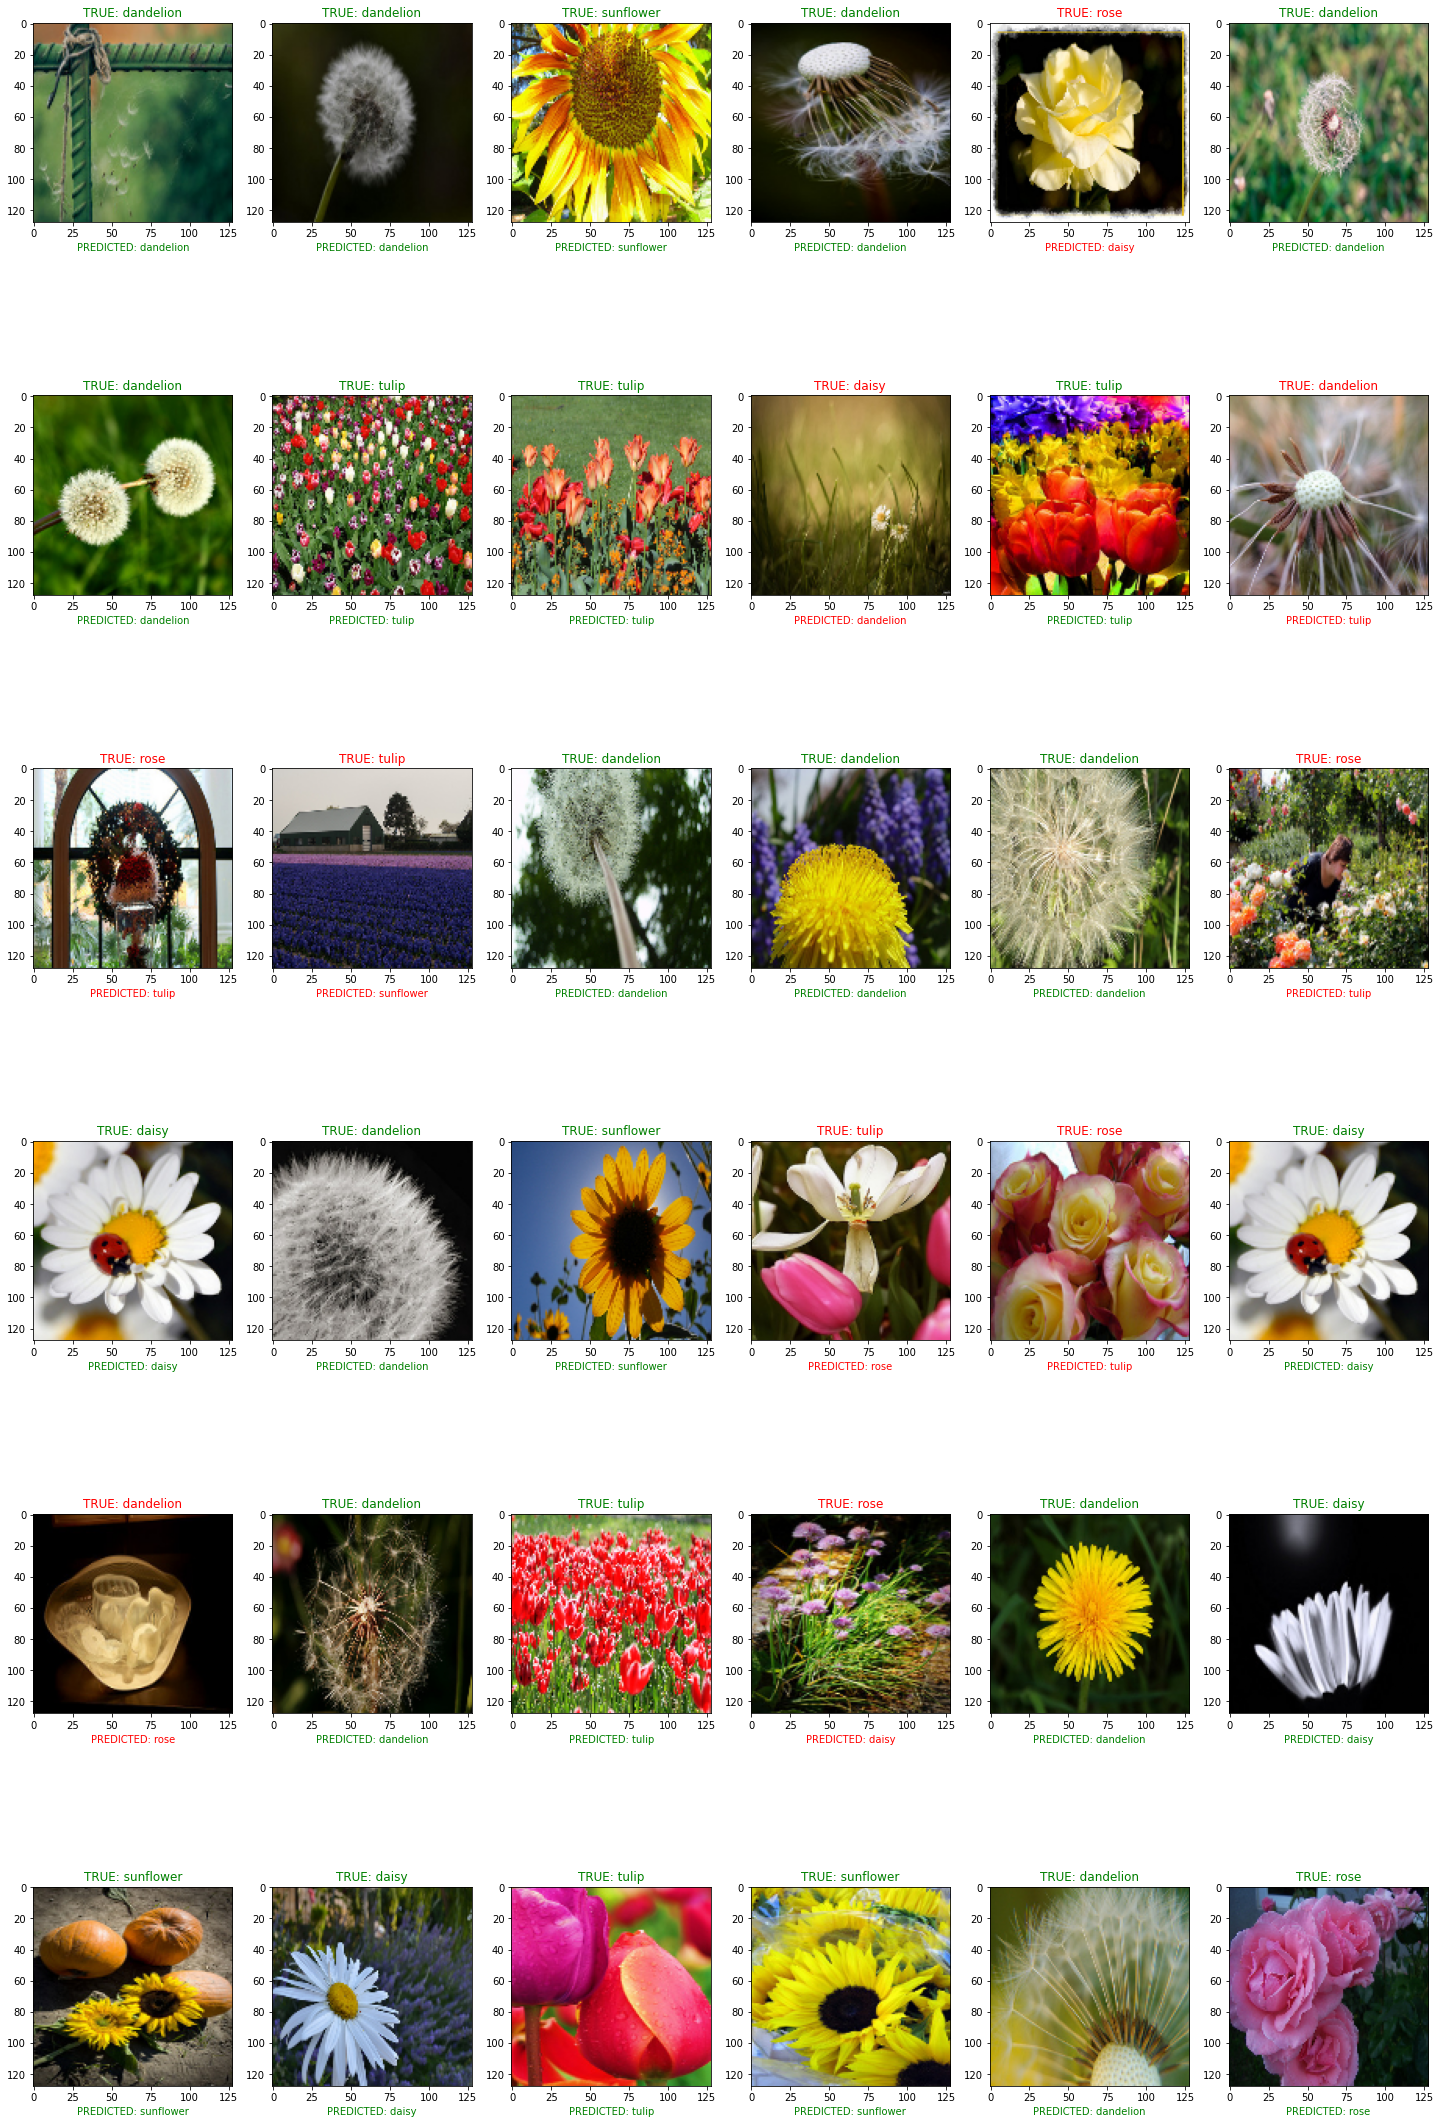

In [ ]:
# Graphical Represenattion of some images
categories = np.sort(os.listdir(dataset_path))
fig, ax = plt.subplots(6,6, figsize=(25, 40))
for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(size, size, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(size, size, 3), cmap='gray')